# Attachment 3.1

# Loading Libraries

In [1]:
pip install -U imbalanced-learn


[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install dtreeviz


[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost



[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install -U scikit-learn


[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Creating the modeling dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
# Data visualization
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
# Model and performance
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFECV 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

### Loading Dataset, observing data and pre-processing

In [6]:
filename = 'SampleOnly.csv'
data = pd.read_csv(filename)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerCode      5820 non-null   object 
 1   CountryName       5820 non-null   object 
 2   USA               5781 non-null   float64
 3   UK                5781 non-null   float64
 4   Italy             5781 non-null   float64
 5   Belgium           5781 non-null   float64
 6   Romania           5781 non-null   float64
 7   Australia         5781 non-null   float64
 8   India             5781 non-null   float64
 9   QtyRequired       5820 non-null   int64  
 10  ITEM_NAME         5820 non-null   object 
 11  Hand Tufted       5820 non-null   int64  
 12  Durry             5820 non-null   int64  
 13  Double Back       5820 non-null   int64  
 14  Hand Woven        5820 non-null   int64  
 15  Knotted           5820 non-null   int64  
 16  Jacquard          5820 non-null   int64  


In [7]:
data.head()

,CustomerCode,CountryName,USA,UK,Italy,Belgium,Romania,Australia,India,QtyRequired,...,Knotted,Jacquard,Handloom,Other,ShapeName,REC,Round,Square,AreaFt,Order Conversion
0,CC,INDIA,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,...,0,0,0,0,REC,1,0,0,80.0,1
1,M-1,USA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,REC,1,0,0,80.0,1
2,M-1,USA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,...,0,0,0,0,REC,1,0,0,80.0,1
3,M-1,USA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,REC,1,0,0,80.0,1
4,M-1,USA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,REC,1,0,0,80.0,1


In [8]:
df = pd.DataFrame(data)
df.count()

CustomerCode        5820
CountryName         5820
USA                 5781
UK                  5781
Italy               5781
Belgium             5781
Romania             5781
Australia           5781
India               5781
QtyRequired         5820
ITEM_NAME           5820
Hand Tufted         5820
Durry               5820
Double Back         5820
Hand Woven          5820
Knotted             5820
Jacquard            5820
Handloom            5820
Other               5820
ShapeName           5820
REC                 5820
Round               5820
Square              5820
AreaFt              5820
Order Conversion    5820
dtype: int64

In [9]:
df.value_counts(['Order Conversion'])

Order Conversion
0                   4651
1                   1169
dtype: int64

In [10]:
df.isnull().any(axis = 0)

CustomerCode        False
CountryName         False
USA                  True
UK                   True
Italy                True
Belgium              True
Romania              True
Australia            True
India                True
QtyRequired         False
ITEM_NAME           False
Hand Tufted         False
Durry               False
Double Back         False
Hand Woven          False
Knotted             False
Jacquard            False
Handloom            False
Other               False
ShapeName           False
REC                 False
Round               False
Square              False
AreaFt              False
Order Conversion    False
dtype: bool

In [11]:
df2 = df.dropna(how='any', axis=0)
df2.isnull().any(axis = 0)

CustomerCode        False
CountryName         False
USA                 False
UK                  False
Italy               False
Belgium             False
Romania             False
Australia           False
India               False
QtyRequired         False
ITEM_NAME           False
Hand Tufted         False
Durry               False
Double Back         False
Hand Woven          False
Knotted             False
Jacquard            False
Handloom            False
Other               False
ShapeName           False
REC                 False
Round               False
Square              False
AreaFt              False
Order Conversion    False
dtype: bool

In [12]:
#Checking for balanced dataset
major_df = df2.loc[df2["Order Conversion"]==0]
minor_df = df2.loc[df2['Order Conversion']==1]
major_df_count = major_df.value_counts(['Order Conversion'])
minor_df_count = minor_df.value_counts(['Order Conversion'])
ratio = int(major_df_count)/int(minor_df_count)
print("ratio: {}".format(ratio))

ratio: 4.022589052997394


In [13]:
#Creating balanced dataset with undersampling
undersample_major_df = major_df.sample(frac=1/ratio)
undersample_major_df.count()

CustomerCode        1151
CountryName         1151
USA                 1151
UK                  1151
Italy               1151
Belgium             1151
Romania             1151
Australia           1151
India               1151
QtyRequired         1151
ITEM_NAME           1151
Hand Tufted         1151
Durry               1151
Double Back         1151
Hand Woven          1151
Knotted             1151
Jacquard            1151
Handloom            1151
Other               1151
ShapeName           1151
REC                 1151
Round               1151
Square              1151
AreaFt              1151
Order Conversion    1151
dtype: int64

In [14]:
df_oc = [undersample_major_df,minor_df]
merge_oc = pd.concat(df_oc)
merge_oc.value_counts(['Order Conversion'])

Order Conversion
0                   1151
1                   1151
dtype: int64

In [15]:
#Creating dummy variables
features_ohe = pd.get_dummies(merge_oc, columns = ['ShapeName'])
features_ohe = features_ohe.drop('CustomerCode',axis=1)
features_ohe = features_ohe.drop('CountryName',axis=1)
features_ohe = features_ohe.drop('ITEM_NAME',axis=1)
features_ohe = features_ohe.drop('ShapeName_REC',axis=1)
features_ohe = features_ohe.drop('ShapeName_ROUND',axis=1)
features_ohe = features_ohe.drop('ShapeName_SQUARE',axis=1)
features_ohe
# Set the display options to show all columns
pd.set_option('display.max_columns', None)
features_ohe

,USA,UK,Italy,Belgium,Romania,Australia,India,QtyRequired,Hand Tufted,Durry,Double Back,Hand Woven,Knotted,Jacquard,Handloom,Other,REC,Round,Square,AreaFt,Order Conversion
5279,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0,0,0,0,0,0,1,0,0,8.4375,0
1435,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,1,0,0,4.0000,0
3199,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1,0,0,0,0,0,0,0,1,0,0,1.7778,0
5408,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,1,0,0,0,0,1,0,0,15.0000,0
5324,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,1,0,0,0,0,1,0,0,39.8125,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5810,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,1,0,0,108.0000,1
5811,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11,0,0,0,0,0,1,0,0,1,0,0,117.0000,1
5812,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0,1,0,0,0,0,0,1,0,0,140.0000,1
5813,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,1,0,0,224.0000,1


In [16]:
#Creating Testing and Training sets from the balanced data
features = features_ohe.drop('Order Conversion', axis=1)
x = features
y = features_ohe.loc[:, 'Order Conversion']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = .80)

# Significant Variable Discovery

## Correlation Coefficients

C:\Users\p-mir\AppData\Local\Temp\ipykernel_29452\872179886.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),


<AxesSubplot:>

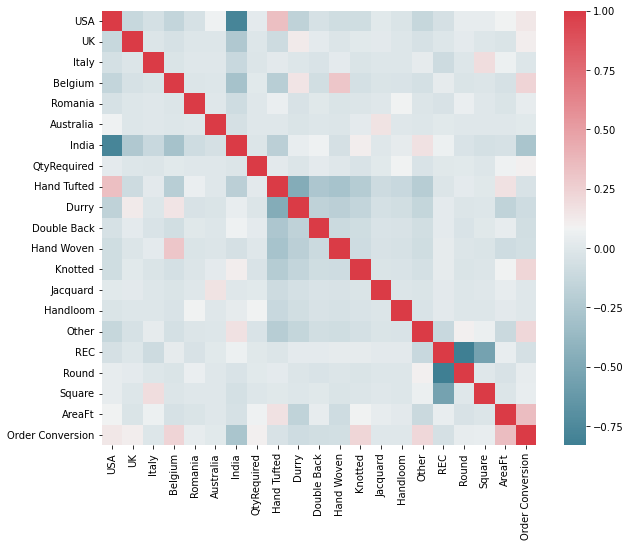

In [17]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(10, 8))
corr = features_ohe.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

## Chi-Square 

In [59]:
feature_selector = SelectKBest(chi2, k = "all")
fit = feature_selector.fit(x,y)

p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
input_variable_names = pd.DataFrame(x.columns)
summary_stats = pd.concat([input_variable_names, p_values, scores], axis = 1)
summary_stats.columns = ["input_variable", "p_value", "chi2_score"]
summary_stats.sort_values(by = "p_value", inplace = True)

p_value_threshold = 0.05
score_threshold = 5

selected_variables = summary_stats.loc[(summary_stats["chi2_score"] >= score_threshold) &
                                       (summary_stats["p_value"] <= p_value_threshold)]
selected_variables = selected_variables["input_variable"].tolist()
X_new = x[selected_variables]
X_new.head()

,AreaFt,QtyRequired,Belgium,Knotted,Other,India,USA,UK,Durry,Double Back,Hand Woven
5279,8.4375,1,0.0,0,0,1.0,0.0,0.0,1,0,0
1435,4.0000,1,0.0,0,0,0.0,1.0,0.0,0,0,0
3199,1.7778,2,0.0,0,0,0.0,0.0,0.0,0,0,0
5408,15.0000,1,0.0,0,0,1.0,0.0,0.0,0,0,1
5324,39.8125,1,0.0,0,0,1.0,0.0,0.0,0,0,1


## Logistic Regression Classifier

In [19]:
#Scaling the data
ss = StandardScaler()
X = ss.fit_transform(features_ohe)
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

In [20]:
#Creating a logistic regression predictive model
model_log_reg = LogisticRegression()
model_log_reg.fit(x_train_scaled, y_train)

LogisticRegression()

0.8004338394793926


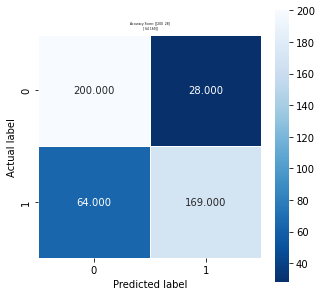

In [21]:
#Creating a confusion matrix of the logistic model
predictions = model_log_reg.predict(x_test_scaled)
cm = metrics.confusion_matrix(y_test, predictions)

# Use score method to get accuracy of the logistic regression model
score = model_log_reg.score(x_test_scaled, y_test)
print(score)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(cm)
plt.title(all_sample_title, size = 3);

In [22]:
#Finding features contributing most to predictive logistic model
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': model_log_reg.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

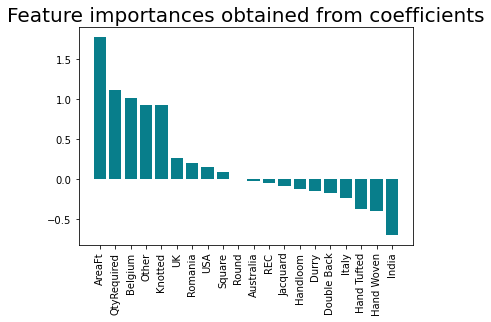

In [23]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## Decision Tree Classifier

In [24]:
#Creating a decision tree classification model
model_dec_tree = DecisionTreeClassifier()
model_dec_tree.fit(x_train_scaled, y_train)
print(model_dec_tree)

DecisionTreeClassifier()


In [25]:
# Make predictions
expected = y_train
predicted = model_dec_tree.predict(x_train_scaled)
  
# Summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       923
           1       0.96      0.84      0.90       918

    accuracy                           0.90      1841
   macro avg       0.91      0.90      0.90      1841
weighted avg       0.91      0.90      0.90      1841

[[891  32]
 [146 772]]


In [26]:
#Finding features most important to decision tree classifier
model = XGBClassifier()
model.fit(x_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

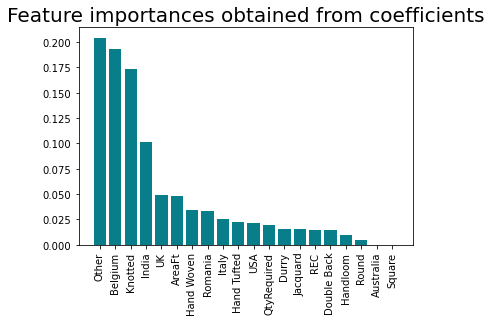

In [27]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## Random Forests

In [28]:
# Create random forest classifier object
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rfc.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = rfc.predict(x_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion matrix:\n', confusion)

Accuracy: 0.8351409978308026
Confusion matrix:
 [[208  20]
 [ 56 177]]


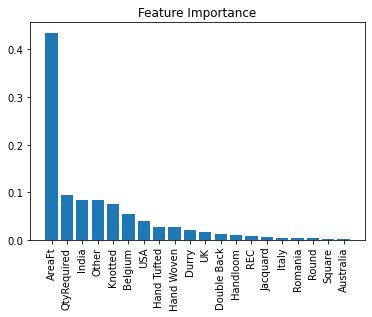

In [29]:
# Create random forest classifier object
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the data
rfc.fit(x, y)

# Get feature importances
importances = rfc.feature_importances_
features = x.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [features[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(x.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(x.shape[1]), names, rotation=90)

# Show plot
plt.show()

## Recursive Feature Elimination with Cross-Validation (RFECV)

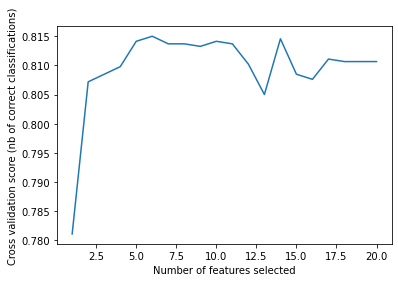

Optimal number of features: 6
Selected features: Index(['feat0', 'feat7', 'feat8', 'feat11', 'feat13', 'feat16'], dtype='object')


In [42]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt



# Create a random forest classifier
rfc = RandomForestClassifier(random_state=42)

# Create an RFECV object with the random forest classifier and 5-fold cross-validation
rfecv = RFECV(estimator=rfc, step=1, cv=5, scoring='accuracy')

# Fit the RFECV object on the data
rfecv.fit(X_pca, y)

# Plot the number of features vs. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

# Convert X to a Pandas DataFrame
X_df = pd.DataFrame(X_pca, columns=['feat'+str(i) for i in range(x.shape[1])])

# Print the optimal number of features and the selected features
print("Optimal number of features: %d" % rfecv.n_features_)
print("Selected features: %s" % X_df.columns[rfecv.support_])

# Clustering Analysis

## PCA

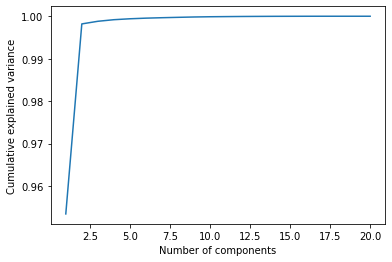

In [32]:
# Create PCA object with n_components equal to the number of features
pca = PCA(n_components=x.shape[1])

# Fit the PCA model on the data
pca.fit(x)

# Get the explained variance ratio for each component
variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance as a function of the number of components
plt.plot(range(1, x.shape[1]+1), np.cumsum(variance_ratio))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

# Transform the data into the principal component space
X_pca = pca.transform(x)

In [33]:
# Get the loading coefficients for each principal component
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Calculate the absolute value of the loading coefficients for each feature
feature_importance = np.abs(loadings).sum(axis=1)

# Rank the features by their importance
feature_ranking = pd.DataFrame({'feature': x.columns, 'importance': feature_importance}).sort_values(by='importance', ascending=False)

# Print the top 10 features by importance
print(feature_ranking.head(10))

        feature  importance
19       AreaFt   26.348346
7   QtyRequired    6.123336
8   Hand Tufted    1.055871
6         India    0.974990
0           USA    0.935754
9         Durry    0.911966
11   Hand Woven    0.734696
12      Knotted    0.644229
10  Double Back    0.630593
3       Belgium    0.612742


## KMeans Clustering Analysis

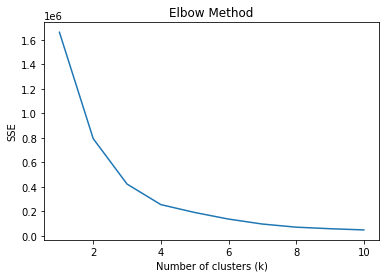

In [34]:
# Create a list to hold the SSE values for each k
sse = []

# Fit KMeans algorithm on the data for different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)

# Plot the SSE values against corresponding values of k
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.show()

# Cluster Characteristics

In [44]:
# Perform KMeans clustering on the dataset
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_pca)

# Get the cluster centers, sizes, WSS, and BSS
cluster_centers = kmeans.cluster_centers_
cluster_sizes = [sum(kmeans.labels_ == i) for i in range(kmeans.n_clusters)]
wss = kmeans.inertia_
bss = kmeans.score(x) * -1

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_pca, kmeans.labels_)

C:\Users\p-mir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\p-mir\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


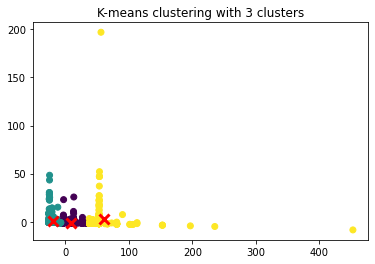

In [50]:
# Plot the data points and cluster assignments
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, linewidths=3, color='r')
plt.title('K-means clustering with 3 clusters')
plt.show()

In [37]:
cluster_sizes

[1046, 1059, 197]

In [38]:
wss

422197.68407385016

In [39]:
bss

3579668.1042319397

In [40]:
silhouette_avg

0.7081557079098887

C:\Users\p-mir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\p-mir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\p-mir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\p-mir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\p-mir\anaconda3\lib\site-packages\sklearn\clust

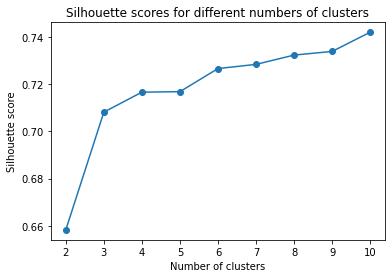

In [41]:
# Define range of number of clusters to test
num_clusters = range(2, 11)

# Compute silhouette scores for each number of clusters
silhouette_scores = []
for n in num_clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X_pca)
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette scores for different numbers of clusters')
plt.show()